In [139]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt

In [140]:
forest_data=pd.read_csv("dataset_forest.csv")

In [141]:
forest_data.shape
forest_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [142]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [143]:
#Removal list initialize
rem = []

#Add constant columns as they don't help in prediction process
for c in forest_data.columns:
    if forest_data[c].std() == 0: #standard deviation is zero
        rem.append(c)

#drop the columns        
forest_data.drop(rem,axis=1,inplace=True)

print(rem)

#Following columns are dropped

['Soil_Type7', 'Soil_Type15']


In [144]:
forest_data.columns[2:-1]

Index(['Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
      dtype='object')

### Linear regression

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Function to calculate RMSE for a set of features
def train_test_rmse():
    x=forest_data.iloc[:,2:-1]
    y=forest_data['Elevation']
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123)
    linreg.fit(x_train,y_train)
    y_pred=linreg.predict(x_test)
    print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    return np.sqrt(metrics.mean_squared_error(y_test,y_pred))
a=train_test_rmse()
print(a)

120.15867239855639
120.15867239855639


### Logistic regression

In [146]:
x=forest_data.iloc[:,1:-1]
y=forest_data['Cover_Type']
#Standardizing the input
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_transformed=ss.fit_transform(x)
x = x_transformed

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13608, 52)
(1512, 52)
(13608,)
(1512,)


In [148]:
## Building the model
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_model=log_reg.fit(x_train,y_train)
print(log_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [149]:
## Prediction with logistic regression model
log_prd=log_model.predict(x_test)
print(accuracy_score(y_test,log_prd))
print(confusion_matrix(y_test,log_prd))
print(classification_report(y_test,log_prd))

0.7162698412698413
[[143  26   2   0  18   3  24]
 [ 34 108   5   0  34  12   5]
 [  0   1 119  21  11  61   0]
 [  0   0  10 204   0  14   0]
 [  7  26  11   0 177  11   0]
 [  0  10  37  16  10 141   0]
 [ 18   0   2   0   0   0 191]]
             precision    recall  f1-score   support

          1       0.71      0.66      0.68       216
          2       0.63      0.55      0.59       198
          3       0.64      0.56      0.60       213
          4       0.85      0.89      0.87       228
          5       0.71      0.76      0.73       232
          6       0.58      0.66      0.62       214
          7       0.87      0.91      0.89       211

avg / total       0.71      0.72      0.71      1512



### SVM

In [150]:
#Prediction with SVC model
clf=SVC(kernel='linear', decision_function_shape='ovr')
model=clf.fit(x_train,y_train)
y_pred=model.predict(x_test)
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [151]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7513227513227513
[[153  31   1   0   7   1  23]
 [ 38 109   6   0  36   6   3]
 [  0   0 132  20   1  60   0]
 [  0   0  10 204   0  14   0]
 [  2  26   4   0 192   8   0]
 [  0   1  43  12   1 157   0]
 [ 20   0   2   0   0   0 189]]
             precision    recall  f1-score   support

          1       0.72      0.71      0.71       216
          2       0.65      0.55      0.60       198
          3       0.67      0.62      0.64       213
          4       0.86      0.89      0.88       228
          5       0.81      0.83      0.82       232
          6       0.64      0.73      0.68       214
          7       0.88      0.90      0.89       211

avg / total       0.75      0.75      0.75      1512



### PCA

[0.0817442  0.05773655 0.04571419 0.03921867 0.03016588 0.02599939]


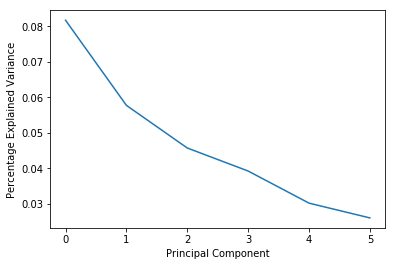

In [152]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=6)
pca_model.fit(x)
print (pca_model.explained_variance_ratio_)
#Plot the explained variance
plt.plot(pca_model.explained_variance_ratio_);
plt.xlabel('Principal Component');
plt.ylabel('Percentage Explained Variance');

Text(204,0.5,'Principal components')

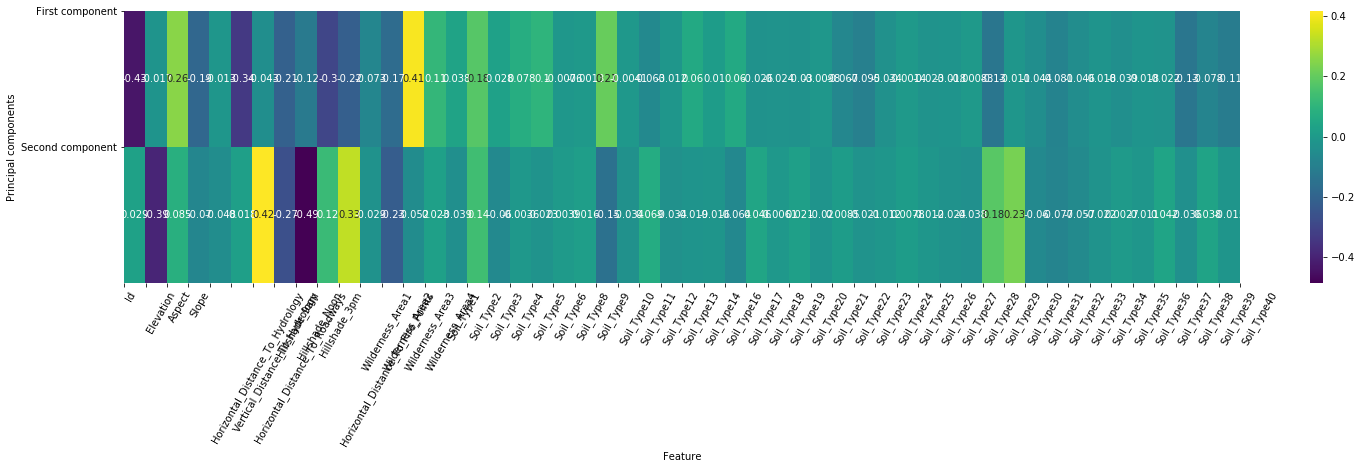

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Visualize coefficients using heat map
feature_cols=list(forest_data.columns[1:-1])
plt.figure(figsize=[25,5])
sns.heatmap(pca_model.components_[0:2,:],annot=True,cmap='viridis')
plt.yticks([0,1],["First component","Second component"],rotation=360,ha="right")
plt.xticks(range(len(feature_cols)),feature_cols,rotation=60,ha="left")
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [154]:
x_pca = PCA(n_components=2)
#Build a PCA model with just the training data
train_pca = x_pca.fit_transform(x_train)
#Fit the test data to the above PCA model
test_pca = x_pca.fit_transform(x_test)

### Decision Tree and Random Forest

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt=DecisionTreeClassifier(criterion="entropy")
dt_model=dt.fit(x_train,y_train)

In [156]:
dt_model.feature_importances_
list(zip(forest_data.columns[1:-1],dt_model.feature_importances_))

[('Elevation', 0.5500972379712693),
 ('Aspect', 0.024229418652024794),
 ('Slope', 0.014048508334571882),
 ('Horizontal_Distance_To_Hydrology', 0.04966597129244957),
 ('Vertical_Distance_To_Hydrology', 0.02933855995903152),
 ('Horizontal_Distance_To_Roadways', 0.07426501153604421),
 ('Hillshade_9am', 0.04544958479884222),
 ('Hillshade_Noon', 0.029135780877662543),
 ('Hillshade_3pm', 0.017667847944643676),
 ('Horizontal_Distance_To_Fire_Points', 0.06813316853772237),
 ('Wilderness_Area1', 0.0262420849074636),
 ('Wilderness_Area2', 0.0010019662529579183),
 ('Wilderness_Area3', 0.008034092774054745),
 ('Wilderness_Area4', 0.0011761896113174604),
 ('Soil_Type1', 0.00015705900505969203),
 ('Soil_Type2', 0.00232957682935079),
 ('Soil_Type3', 0.011568737317093946),
 ('Soil_Type4', 0.007387142131540532),
 ('Soil_Type5', 0.0007410205375556269),
 ('Soil_Type6', 0.0013143311440733261),
 ('Soil_Type8', 0.0),
 ('Soil_Type9', 0.0),
 ('Soil_Type10', 0.007687649167018301),
 ('Soil_Type11', 0.0029463950

In [157]:
from sklearn import tree
with open("forest.dot", 'w') as f:
    f = tree.export_graphviz(dt_model, out_file=f, feature_names=forest_data.columns[1:-1])

In [158]:
dt_prd=dt_model.predict(x_test)
print(accuracy_score(y_test,dt_prd))
df_confusion = confusion_matrix(y_test,dt_prd)
df_confusion

0.7916666666666666


array([[143,  49,   0,   0,   5,   2,  17],
       [ 38, 124,   4,   0,  23,   8,   1],
       [  1,   5, 158,   4,   5,  40,   0],
       [  0,   0,  18, 203,   0,   7,   0],
       [  2,  20,   5,   0, 201,   4,   0],
       [  0,   4,  32,   5,   4, 169,   0],
       [ 10,   1,   0,   0,   1,   0, 199]], dtype=int64)

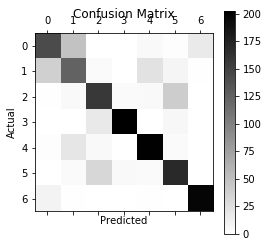

In [159]:
import matplotlib.pyplot as plt
% matplotlib inline
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plot_confusion_matrix(df_confusion)

In [160]:
rf_clf=RandomForestClassifier(max_depth = 24, min_samples_split=2, n_estimators = 10, random_state = 123)
rf_model=rf_clf.fit(x_train,y_train)
rf_prediction=rf_model.predict(x_test)

In [161]:
print(accuracy_score(y_test,rf_prediction))

0.8518518518518519


In [162]:
rf_params={"criterion":['gini','entropy'],"n_estimators":[10,30,100],"max_depth":[20,30],"max_leaf_nodes": [20,40,50]}

In [163]:
grid_rf_clf=GridSearchCV(RandomForestClassifier(),rf_params)

In [164]:
grid_rf_model=grid_rf_clf.fit(x_train,y_train)

In [165]:
grid_rf_model.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_leaf_nodes': 50,
 'n_estimators': 30}

In [166]:
grid_rf_prediction=grid_rf_model.predict(x_test)

In [167]:
print(accuracy_score(y_test,grid_rf_prediction))

0.7698412698412699


### K Nearest Neighbours

In [168]:
from sklearn.neighbors import KNeighborsClassifier
# Defining The parameters in KNN Classifier
clf_knn = KNeighborsClassifier(
    n_neighbors=4,
    weights='distance'
    )
clf_knn = clf_knn.fit(x_train,y_train)

In [169]:
from sklearn.model_selection import cross_val_score
# Computing the Cross validation score with 5-fold cross validation
score_knn = cross_val_score(clf_knn, x_train, y_train, cv=5)
print("Cross Validation score : " + str(score_knn))
print("Cross Validation Mean score : " + str(score_knn.mean()))

Cross Validation score : [0.80036697 0.81093979 0.80117604 0.79705882 0.81236203]
Cross Validation Mean score : 0.8043807319105533


### Kmeans

In [172]:
#let's build clusters
from sklearn.cluster import KMeans
num_of_clusters = range(30,100)
error = []

for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(x_train)
    error.append(clusters.inertia_/100)
    
df=pd.DataFrame({"Cluster_Numbers":num_of_clusters, "Error_Term":error})
df
#print (clusters)

,Cluster_Numbers,Error_Term
0,30,2268.083613
1,31,2123.866950
2,32,1984.851945
3,33,1860.285437
4,34,1799.380095
5,35,1644.741162
6,36,1535.646147
7,37,1387.889186
8,38,1352.529490
9,39,1228.494505


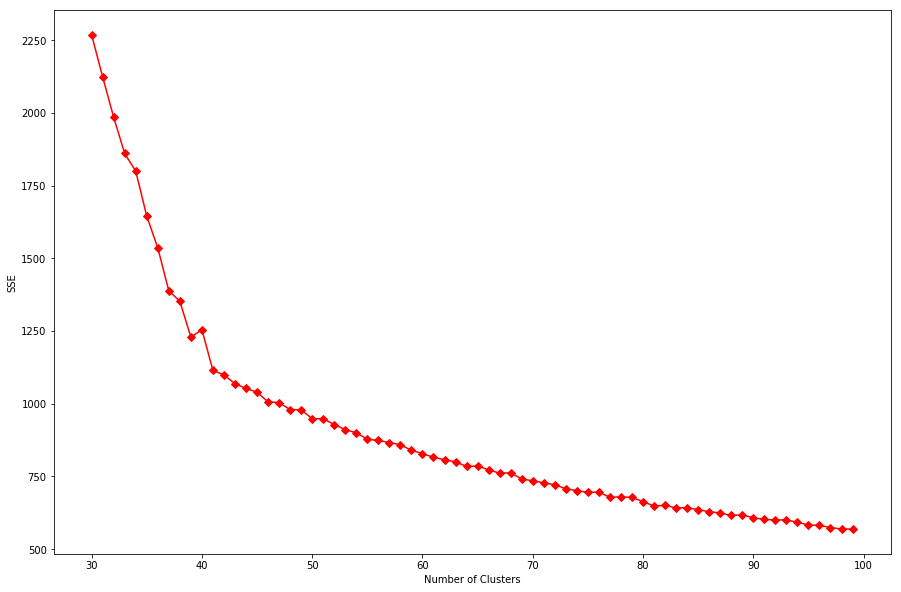

In [173]:
#Find the right number of clusters
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
plt.plot(df.Cluster_Numbers, df.Error_Term, marker = "D", color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()